In [1]:
import matplotlib as mpl
mpl.rcParams["font.size"] = 11
mpl.rcParams["xtick.color"] = "tab:grey"
mpl.rcParams["ytick.color"] = "tab:grey"
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["axes.edgecolor"] = "#eae8e9" 

from CADMium import Pssolver, Psgrid, Partition, Inverter
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
a = 4.9322/2

Za = 2
Zb = 2

pol = 1

Nmo_a = [[1]]
Na   = [[2]]
nua  = 1

Nmo_b = [[1]]
Nb    = [[2]]
nub   = 1

Nmo = [[2]]
Nm  = [[4]]

optPartition = {
                "AB_SYM" : False,
                "ENS_SPIN_SYM" : False
               }

NP = 7
NM = [6, 6]
L = np.arccosh(12/a)
loc = np.array(range(-4,5))

grid = Psgrid(NP, NM ,a, L, loc)
grid.initialize()


part = Partition(grid, Za, Zb, pol, Nmo_a, Na, nua, Nmo_b, Nb, nub, { "kinetic_part_type" : "twoorbital",
                                                                          "ab_sym"            : True,
                                                                          "ens_spin_sym"      : False,
                                                                          "interaction_type"  : 'dft',
                                                                          "xfunc_id"          : 1,
                                                                          "cfunc_id"          : 12,})
#Setup inverter object
mol_solver = Pssolver(grid, Nmo, Nm )

part.inverter = Inverter(grid, mol_solver, {"invert_type"    : "wuyang", 
                                            "ab_sym"         : True,
                                            "ens_spin_sym"   : False,
                                            # "tol_lin_solver" : 1e-3,
                                            # "tol_invert"     : 1e-4,
                                            # "res_factor"     : 0,
                                           })

part.optPartition.isolated = True
part.scf({"disp"  : True,
          "alpha" : [0.6],
          "e_tol" : 1e-10
          })

part.optPartition.isolated   = False
part.inverter.optInv.invert_type = 'orbitalinvert'
part.optPartition.kinetic_part_type = 'inversion'
part.scf({"disp"       : True,
          "e_tol"      : 1e-10,
          "max_iter"   : 20,
          "continuing" : True,
          "alpha"      : [0.35]})

part.optPartition.kinetic_part_type = 'twoorbital'
part.optPartition.isolated   = False
part.scf({"disp"       : True,
          "alpha"      : [0.82],
          "max_iter"   : 100,
          "e_tol"      : 1e-7,
          "continuing" : True, 
          "iterative"  : True})


----> Begin SCF calculation for *Isolated* Fragments

                Total Energy (a.u.)       

                __________________        

Iteration         A            B              res     

_______________________________________________________

    1           -3.46571     -3.46571       1.000e+00 
    2           -2.91944     -2.91944       4.563e-02 
    3           -2.84865     -2.84865       8.722e-03 
    4           -2.83746     -2.83746       2.215e-03 
    5           -2.83529     -2.83529       7.071e-04 
    6           -2.83474     -2.83474       2.551e-04 
    7           -2.83457     -2.83457       9.737e-05 
    8           -2.83451     -2.83451       3.799e-05 
    9           -2.83449     -2.83449       1.495e-05 
   10           -2.83448     -2.83448       5.901e-06 
   11           -2.83448     -2.83448       2.332e-06 
   12           -2.83448     -2.83448       9.216e-07 
   13           -2.83448     -2.83448       3.642e-07 
   14           -2.83448     -

/mnt/c/Users/victo/Dropbox/PHD/cadmium/CADMium/CADMium/partition/scf.py:252: UserWarning: SCF Warning: Max number of Iterations Surpassed. Desired convergence may have not been achieved
  warn("SCF Warning: Max number of Iterations Surpassed. Desired convergence may have not been achieved")


   50            -2.83447        -2.83447             2       +4.709e-15      +4.700e-09
----> Begin SCF calculation for *Interacting* Fragments

                Total Energy (a.u.)       

                __________________        

Iteration         A            B              res     

_______________________________________________________

    1           -1.52724     -1.52724       1.000e+00 
    2           -3.17829     -3.17829       7.659e-01 
    3           -2.78324     -2.78324       6.124e-02 
    4           -2.84887     -2.84887       4.812e-02 
    5           -2.83285     -2.83285       2.066e-03 
    6           -2.83491     -2.83491       1.558e-03 
    7           -2.83443     -2.83443       6.132e-05 
    8           -2.83449     -2.83449       4.635e-05 
    9           -2.83447     -2.83447       1.908e-06 
   10           -2.83447     -2.83447       1.420e-06 
   11           -2.83447     -2.83447       6.034e-08 


(-0.05, 0.05)

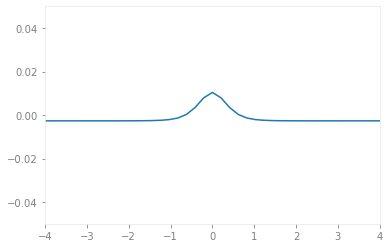

In [4]:
x,y = grid.axis_plot( part.V.vp_kin )
plt.plot(x,y)
plt.xlim(-4,4)
plt.ylim(-0.05, 0.05)

NameError: name 'd1' is not defined

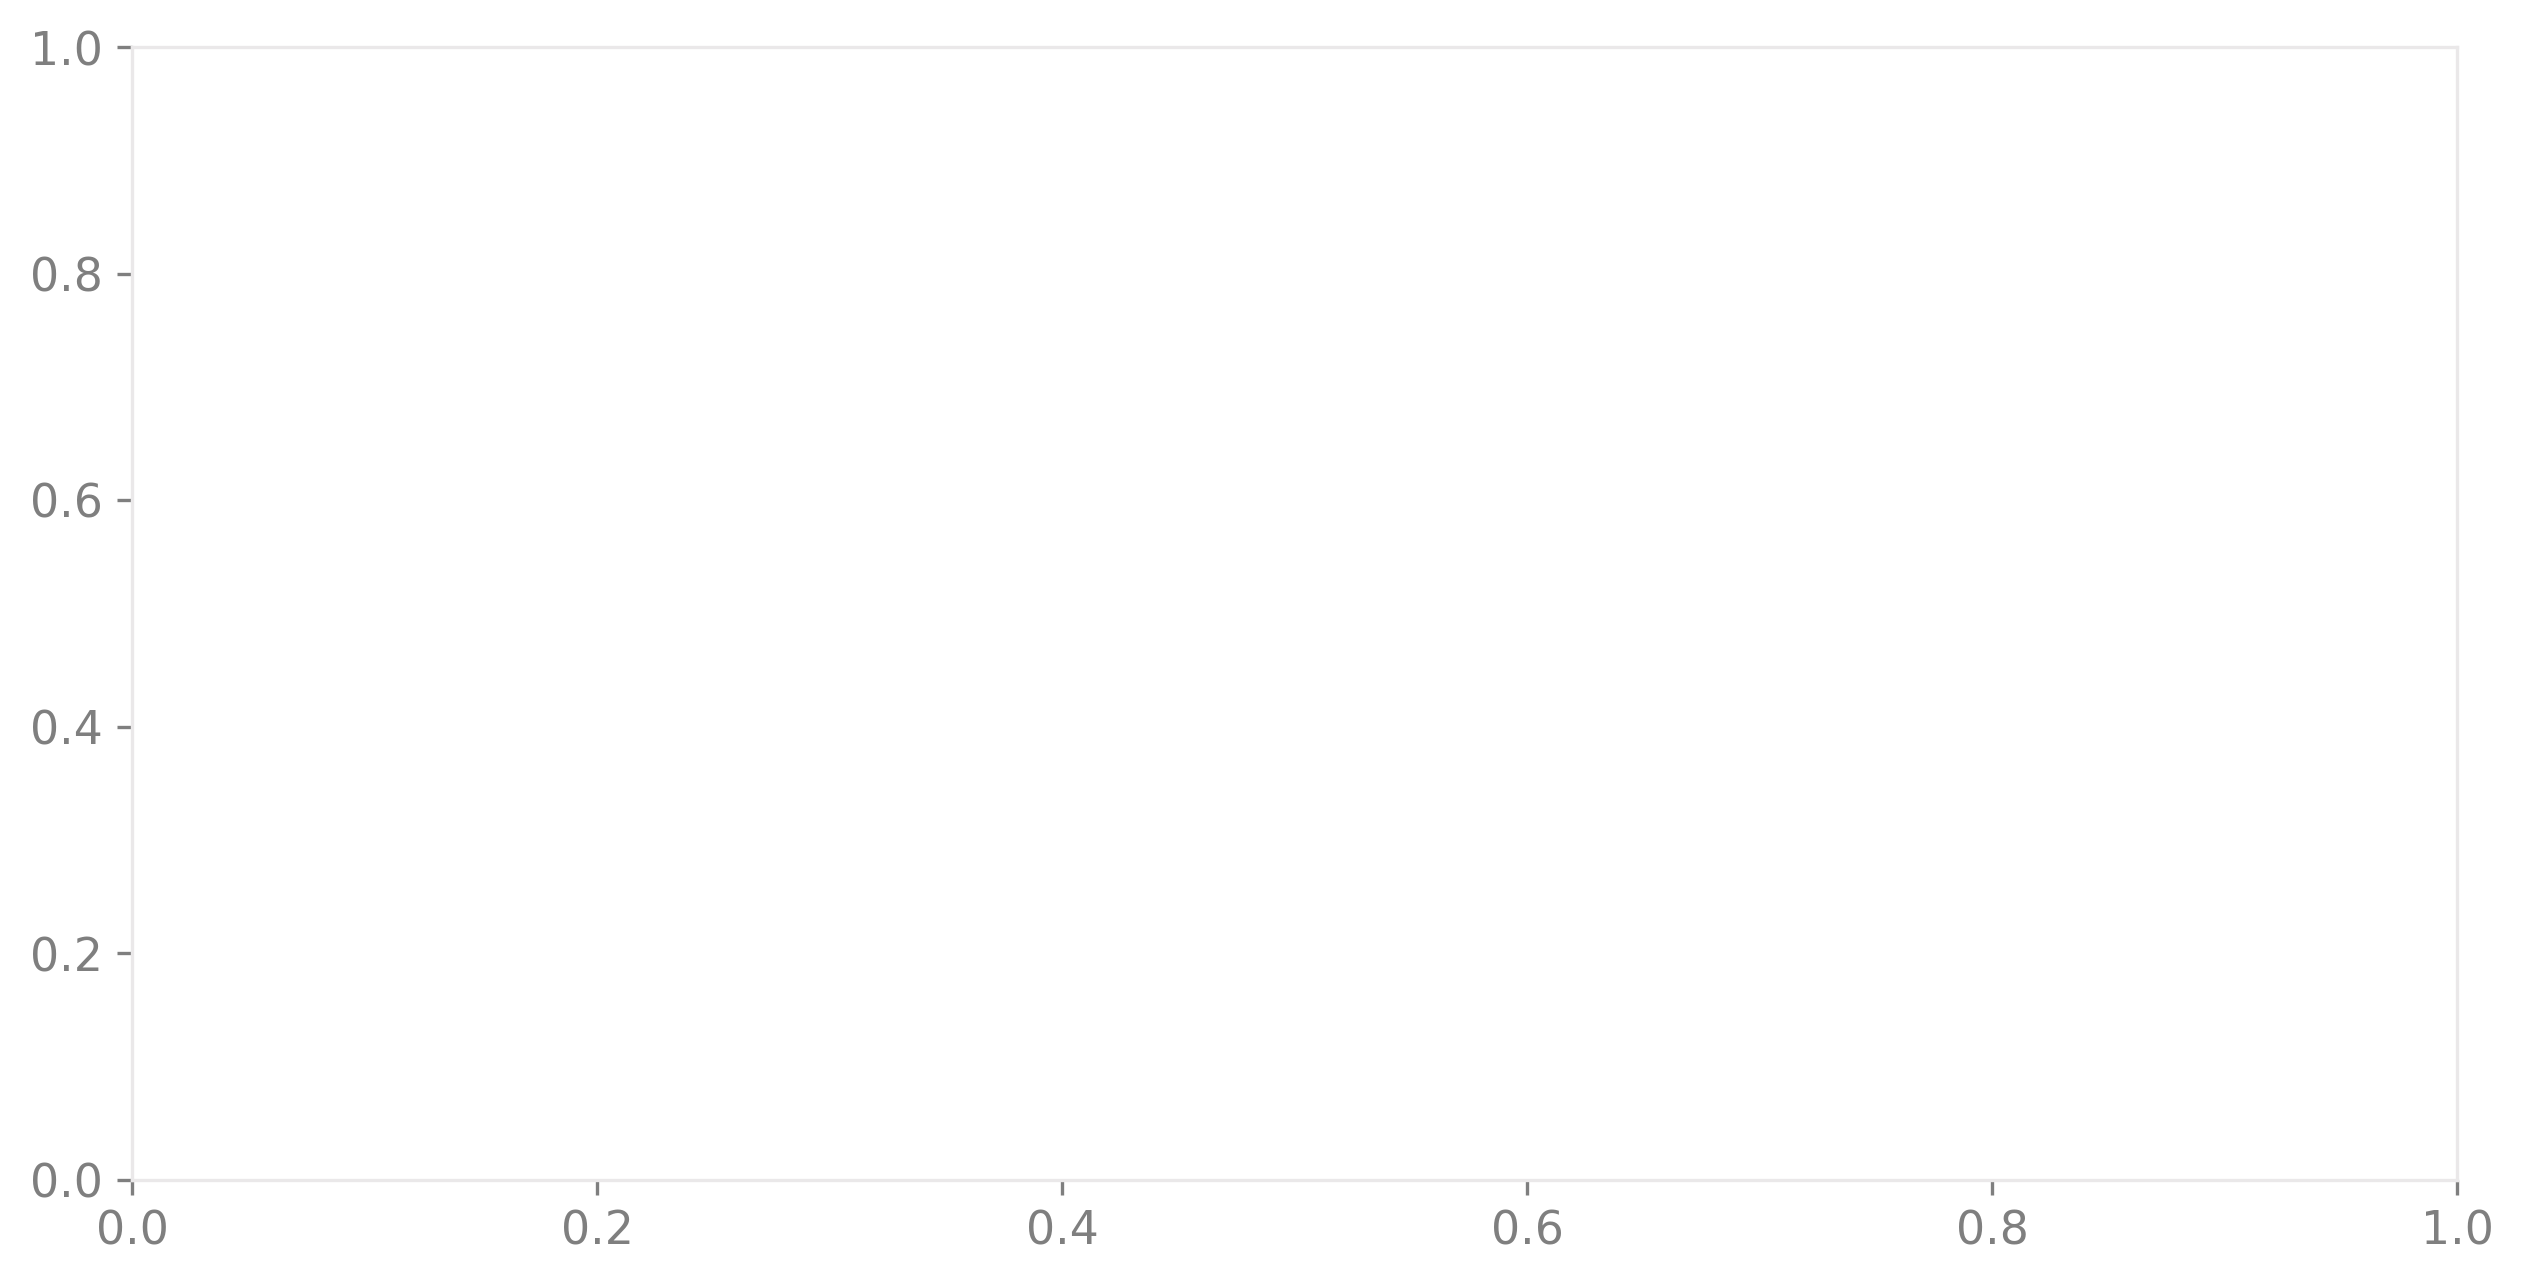

In [40]:

fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=300)

plt.fill(x, d1)
plt.fill(x, d2)